In [1]:
!pip install selenium chromedriver-autoinstaller beautifulsoup4 pandas



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 1.8/1.8 MB 9.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 25.1.1
    Uninstalling pip-25.1.1:
      Successfully uninstalled pip-25.1.1


In [49]:
import chromedriver_autoinstaller
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import time
from bs4 import BeautifulSoup
import pandas as pd
import requests

In [60]:
website="https://www.cars24.com/buy-used-cars-hyderabad/"

In [56]:
response.status_code

200

In [59]:
soup

<!DOCTYPE html>
<html lang="en"><head><meta charset="utf-8"/><meta content="width=device-width, initial-scale=1, maximum-scale=5, user-scalable=yes" name="viewport"/><link data-precedence="next" href="https://assets.cars24.com/production/india-website/catalog/251108045047/_next/static/css/cf23dc6370fc7b6b.css" rel="stylesheet"/><link data-precedence="next" href="https://assets.cars24.com/production/india-website/catalog/251108045047/_next/static/css/688f3320d9926712.css" rel="stylesheet"/><link data-precedence="next" href="https://assets.cars24.com/production/india-website/catalog/251108045047/_next/static/css/9cb841275a764f72.css" rel="stylesheet"/><link data-precedence="next" href="https://assets.cars24.com/production/india-website/catalog/251108045047/_next/static/css/1b6884c9e912457b.css" rel="stylesheet"/><link data-precedence="next" href="https://assets.cars24.com/production/india-website/catalog/251108045047/_next/static/css/17dba47ece63a04f.css" rel="stylesheet"/><link data-pre

In [61]:

soup = BeautifulSoup(page_source, "html.parser")

# Each car name, e.g., "2018 Renault Kwid"
car_name_tags = soup.find_all("span", class_="sc-bRKDuR jtaHBC")
car_names_full = [tag.get_text(strip=True) for tag in car_name_tags]

# All <p class="sc-bRKDuR eTYSzW"> have info in order: km, fuel, transmission, registration
car_detail_tags = soup.find_all("p", class_="sc-bRKDuR eTYSzW")
car_details = [tag.get_text(strip=True) for tag in car_detail_tags]
# Each car has 4 details, group them accordingly
details_per_car = 4
grouped_details = [car_details[i:i+details_per_car] for i in range(0, len(car_details), details_per_car)]

# Extract car price
price_tags = soup.find_all("p", class_="sc-bRKDuR bdSJhg")
car_prices = [tag.get_text(strip=True) for tag in price_tags]

# Prepare structured data
cars_data = []
for idx, name_full in enumerate(car_names_full):
    # Extract year, brand, model
    m = re.match(r"(\d{4})\s+(\w+)\s+(.+)", name_full)
    if m:
        year, brand, model = m.groups()
    else:
        year, brand, model = "", "", name_full
    
    # Get matching details
    if idx < len(grouped_details):
        km, fuel, transmission, registration = grouped_details[idx]
    else:
        km, fuel, transmission, registration = "", "", "", ""
    
    # Price
    price = car_prices[idx] if idx < len(car_prices) else ""
    
    cars_data.append({
        "Year": year,
        "Brand": brand,
        "Model": model,
        "Kilometers Driven": km,
        "Fuel Type": fuel,
        "Transmission": transmission,
        "Registration": registration,
        "Price": price
    })

# Create DataFrame
cars_df = pd.DataFrame(cars_data)
cars_df.head()


,Year,Brand,Model,Kilometers Driven,Fuel Type,Transmission,Registration,Price
0,2018,Renault,Kwid,34.01k km,Petrol,Auto,TS-11,Account
1,2020,Tata,Harrier,76.25k km,Diesel,Manual,TS-07,
2,2017,Maruti,Alto 800,18.41k km,Petrol,Manual,TS-08,₹2.49 lakh
3,2021,KIA,SELTOS,83.08k km,Diesel,Auto,TS-15,₹8.62 lakh
4,2023,Maruti,JIMNY,64.50k km,Petrol,Manual,TS-21,₹2.72 lakh


In [54]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

display(cars_df)


,Year,Brand,Model,Kilometers Driven,Fuel Type,Transmission,Registration,Price
0,2018,Renault,Kwid,34.01k km,Petrol,Auto,TS-11,Account
1,2020,Tata,Harrier,76.25k km,Diesel,Manual,TS-07,
2,2017,Maruti,Alto 800,18.41k km,Petrol,Manual,TS-08,₹2.49 lakh
3,2021,KIA,SELTOS,83.08k km,Diesel,Auto,TS-15,₹8.62 lakh
4,2023,Maruti,JIMNY,64.50k km,Petrol,Manual,TS-21,₹2.72 lakh
5,2015,Volkswagen,Polo,73.82k km,Petrol,Manual,TS-07,₹11.44 lakh
6,2018,Renault,Kwid,34.52k km,Petrol,Manual,TS-07,₹7.79 lakh
7,2016,Datsun,Redi Go,89.68k km,Petrol,Manual,TS-08,₹3.61 lakh
8,2017,Maruti,Baleno,31.06k km,Petrol,Manual,TS-08,₹3.25 lakh
9,2015,Honda,Jazz,65.00k km,Petrol,Auto,TS-09,₹1.66 lakh


In [63]:
# Save DataFrame to CSV file without index column
cars_df.to_csv("cars24_hyderabad_cars_data.csv", index=False)
print("Data saved to cars24_hyderabad_cars_data.csv")


Data saved to cars24_hyderabad_cars_data.csv


Car listings count per Brand:
Brand
Maruti        5
Honda         5
Renault       3
KIA           2
Tata          1
Volkswagen    1
Datsun        1
Hyundai       1
Ford          1
Name: count, dtype: int64


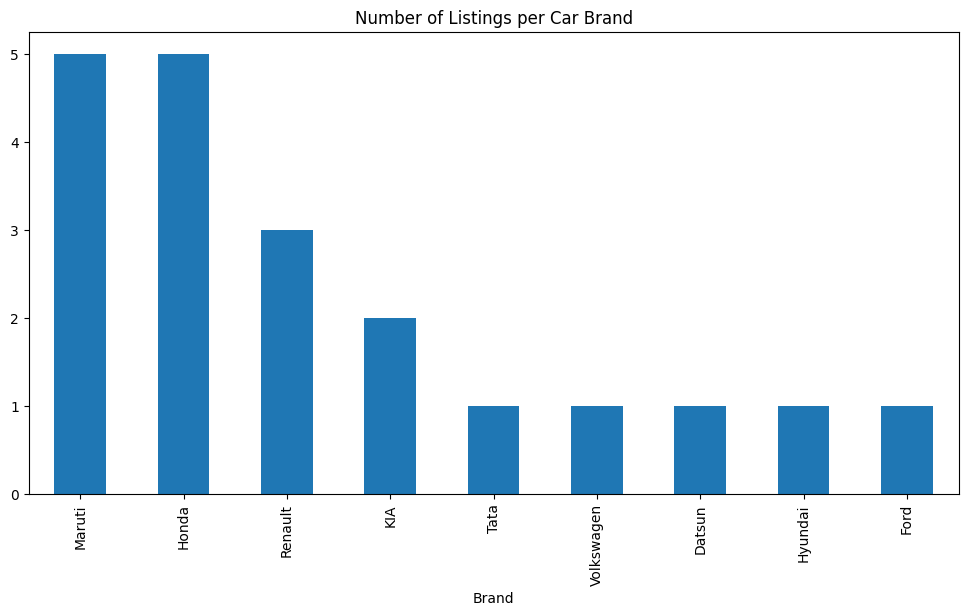

In [65]:
brand_counts = cars_df["Brand"].value_counts()
print("Car listings count per Brand:")
print(brand_counts)

# Plotting (optional)
import matplotlib.pyplot as plt
brand_counts.plot(kind='bar', figsize=(12,6), title="Number of Listings per Car Brand")
plt.show()


In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


C:\Users\lokam\AppData\Local\Temp\ipykernel_11132\2570095697.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_counts.index, y=brand_counts.values, palette="viridis")


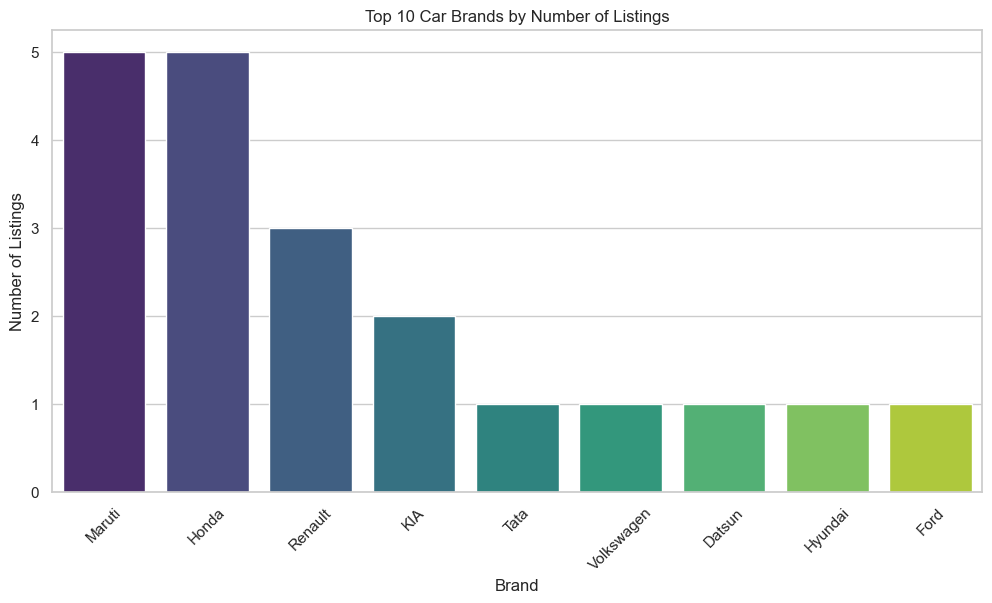

In [69]:
# Count listings by brand and plot top 10 brands
brand_counts = cars_df['Brand'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=brand_counts.index, y=brand_counts.values, palette="viridis")
plt.title("Top 10 Car Brands by Number of Listings")
plt.xlabel("Brand")
plt.ylabel("Number of Listings")
plt.xticks(rotation=45)

plt.show()


C:\Users\lokam\AppData\Local\Temp\ipykernel_11132\1850070357.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_counts.index, y=model_counts.values, palette="magma")


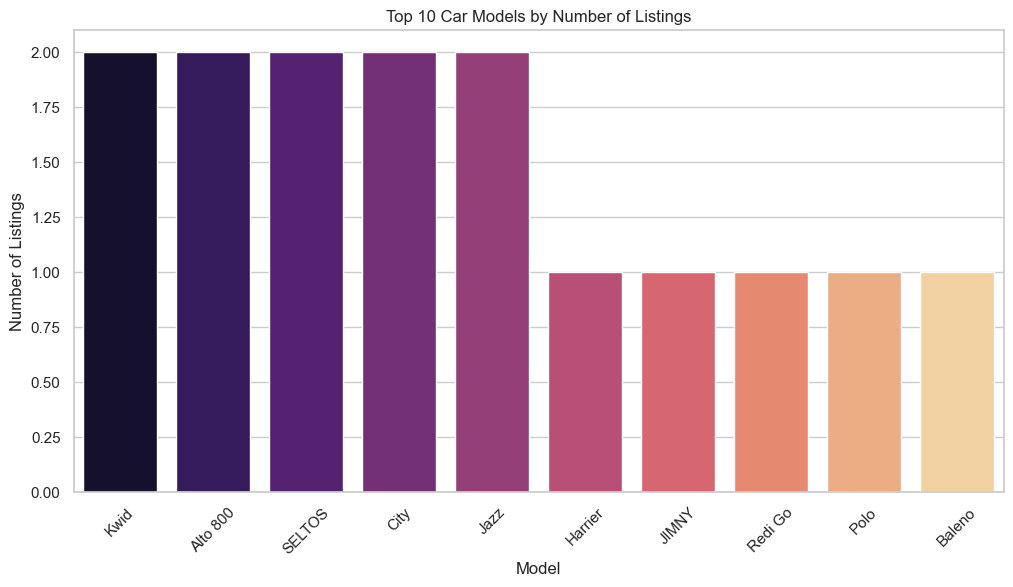

In [70]:
model_counts = cars_df['Model'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=model_counts.index, y=model_counts.values, palette="magma")
plt.title("Top 10 Car Models by Number of Listings")
plt.xlabel("Model")
plt.ylabel("Number of Listings")
plt.xticks(rotation=45)

plt.show()


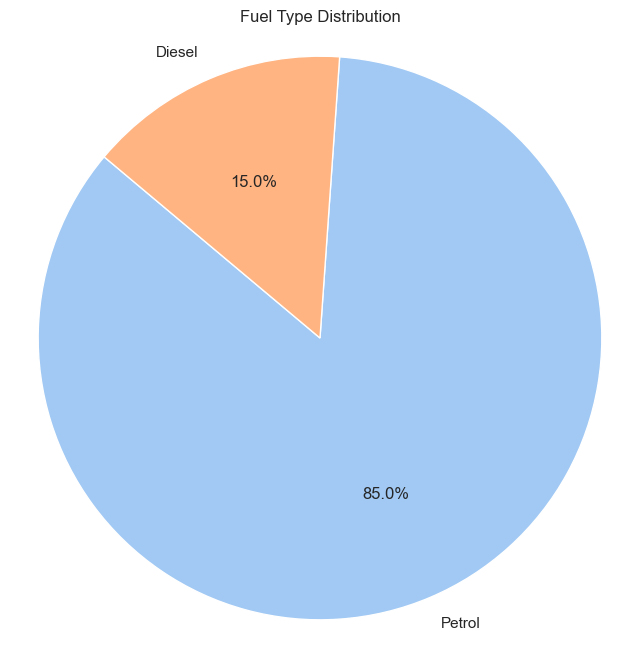

In [71]:
fuel_counts = cars_df['Fuel Type'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(fuel_counts, labels=fuel_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Fuel Type Distribution')
plt.axis('equal')
plt.show()
